In [46]:
import numpy as np
from scipy import *
import os
import h5py
from keras import backend as K
from keras import optimizers
from keras.layers import Dense, Activation, Dropout, ZeroPadding2D, Convolution2D, Flatten, MaxPooling2D
from keras.optimizers import SGD, adam
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from sklearn.utils import shuffle
from keras.utils import np_utils
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import pickle 
from skimage.transform import rescale
from keras.models import model_from_json

In [21]:
file = open("images.dat",'rb')
images = pickle.load(file)
file.close()

file = open("labels.dat",'rb')
labels = pickle.load(file)
file.close()

In [22]:
images = images.reshape(-1, 89, 89)

In [23]:
hog_img  = []

for i, image in enumerate(images):
    fd = hog(images[i, :, :], orientations=8, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualise=False, feature_vector=True,block_norm="L2")
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')
    ax1.set_adjustable('box-forced')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    ax1.set_adjustable('box-forced')
    plt.show()
    """
    hog_img.append(fd)
    

In [24]:
# balance classes
def bal_classes(images, labels):
    class1 = []
    class2 = []
    
    for i in range(labels.shape[0]):
        if labels[i] == False:
            class1.append(i)
    
    for i in range(labels.shape[0]):
        if labels[i] == True:
            class2.append(i)
    
    if len(class2) > len(class1):
        class2 = np.asarray(class2[:len(class1)])
    
    elif len(class2) < len(class1):
        class1 = np.asarray(class1[:len(class2)])
        
    images1 = images[class1, :] 
    images2 = images[class2, :]
    labels1 = labels[class1,]
    labels2 = labels[class2,]
    
    print (labels2.shape)
    
    images_st = np.vstack((images1, images2))
    labels_st =  np.concatenate((labels1, labels2), axis=0)              
        
    images_s, labels_s = shuffle(np.asarray(images_st), np.asarray(labels_st), random_state = 0)    
        
    return images_s, labels_s

In [251]:
images_p, labels_p = bal_classes(np.asarray(hog_img), np.asarray(labels))

(1216,)


In [252]:
#imgs = np.reshape(images_p, (-1, 135, 135))

#for n in range(0, imgs.shape[0]):
   #plt.imshow(imgs[n,:,:], cmap='gray', shape=(135, 135))
   #print (n)
   #print (normalized_labels[n])
   #plt.show()

In [253]:
# Split data into training and testing sets

def format_data(images, labels, ratio = 0.5):
    split = round(ratio*images.shape[0])
    
    train_x = images[ :split, :]
    test_x = images[split:, :]
    train_y = labels[ :split]
    test_y = labels[split:]
    
    return train_x, test_x, train_y, test_y


train_x, test_x, train_y, test_y = format_data(images_p, labels_p)

In [254]:
# Convert class vectors to binary class matrices
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)

In [255]:
# Define model attributes
batch_size = 20
nb_classes = output_dims = 2
nb_epoch = 30
input_dim = 3200

# create model
model = Sequential()
model.add(Dense(100, input_dim = input_dim, activation = 'softmax'))
model.add(Dropout(0.2))
model.add(Dense(200, input_dim = input_dim, activation = 'softmax'))
model.add(Dropout(0.2))
model.add(Dense(units=output_dims, activation = "sigmoid"))

In [256]:
"""
# load json and create model
json_file = open('model_deephog.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_deephog.h5")
print("Loaded model from disk"
"""

'\n# load json and create model\njson_file = open(\'model_deephog.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("model_deephog.h5")\nprint("Loaded model from disk"\n'

In [257]:
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=nb_epoch, batch_size=batch_size, 
          validation_data=(test_x, test_y))

Train on 1216 samples, validate on 1216 samples
Epoch 1/30
1216/1216 [==============================] - 27s 22ms/step - loss: 0.6931 - acc: 0.5140 - val_loss: 0.6933 - val_acc: 0.4885
Epoch 2/30
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6930 - acc: 0.5115 - val_loss: 0.6933 - val_acc: 0.4885
Epoch 3/30
1216/1216 [==============================] - 1s 1ms/step - loss: 0.6930 - acc: 0.5115 - val_loss: 0.6934 - val_acc: 0.4885
Epoch 4/30
1216/1216 [==============================] - 1s 979us/step - loss: 0.6924 - acc: 0.5115 - val_loss: 0.6925 - val_acc: 0.4885
Epoch 5/30
1216/1216 [==============================] - 1s 921us/step - loss: 0.6923 - acc: 0.5115 - val_loss: 0.6926 - val_acc: 0.4885
Epoch 6/30
1216/1216 [==============================] - 1s 962us/step - loss: 0.6904 - acc: 0.5115 - val_loss: 0.6904 - val_acc: 0.4885
Epoch 7/30
1216/1216 [==============================] - 1s 958us/step - loss: 0.6878 - acc: 0.5115 - val_loss: 0.6880 - val_acc: 0.4885
Epoc

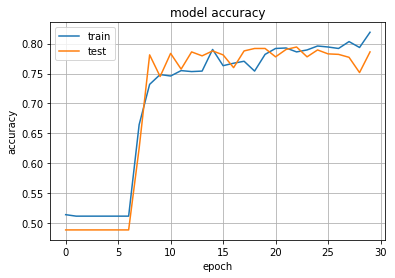

In [259]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [250]:

# serialize model to JSON
model_json = model.to_json()
with open("model_deephog.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_deephog.h5")
print("Saved model to disk")


Saved model to disk


In [13]:
for layer in model.layers:
    weights = layer.get_weights()

wt = np.reshape(weights[0], (135, 135, 2))
    
for n in range(0, wt.shape[2]):
   plt.imshow(wt[:,:,n], cmap='gray', shape=(135, 135))
   print (n)
   plt.show()

print ("Dense to output layer weights " + str(weights[1]))

ValueError: cannot reshape array of size 400 into shape (135,135,2)

In [ ]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))